# Annamaria Simonitto - Project work on data mining m

In [1]:
# I imported the dataset from Kaggle website

In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import pyplot
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from plot_silhouette import plot_silhouette
from plot_clusters import plot_clusters
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

#Directives
np.random.seed(2)
plt.style.use('ggplot')
%matplotlib inline
#variables
path = 'AgeDataset-V1.csv'
sep = ','
random_state = 40

pd.options.mode.chained_assignment = None

In [3]:
#Read the file
#Use `df` as data frame name
df0 = pd.read_csv(path , delimiter = sep)

### I use the 'sample' method to reduce the dataset and I take only 5% of it

In [4]:
df1 = df0.sample(frac = 0.05, random_state = random_state)
df1

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
168756,Q1452719,Frederick Deacon,chess master,Male,United Kingdom of Great Britain and Ireland,Athlete,1829,1875.0,NaN,46.0
195186,Q1638671,Otto Waffenschmied,"Austrian illustrator, comics artist and editor",Male,Austria,Artist,1901,1971.0,NaN,70.0
1184686,Q62604028,Arnold Ebrok,Estonian rowing coach,Male,Estonia,Athlete,1921,2011.0,NaN,90.0
724043,Q12142255,Пономаренко Григорій Якович,historicus,NaN,NaN,Researcher,1922,2009.0,NaN,87.0
1063139,Q37423098,Maria Petronella van der Klugt-Witteman,Dutch politician and mayor,Female,Kingdom of the Netherlands,Politician,1926,1997.0,NaN,71.0
...,...,...,...,...,...,...,...,...,...,...
362167,Q3849032,Mario Ridolfi,Italian architect,Male,Italy; Kingdom of Italy,Architect,1904,1984.0,NaN,80.0
572990,Q6710948,Léandre Lacroix,Luxembourgian politician (1859-1935),Male,Luxembourg,Politician,1859,1935.0,NaN,76.0
400268,Q4707747,Alan Shapley,United States Marine Corps general,Male,United States of America,Military personnel,1903,1973.0,NaN,70.0
571567,Q6687665,Louis Liebe,German composer,Male,Germany,Artist,1819,1900.0,NaN,81.0


In [5]:
# Show the shape of the data
print("the dataframe size are: "+str(df1.shape))

the dataframe size are: (61150, 10)


In [6]:
#Show column names
df1.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')

In [7]:
#Show portion of data
df1.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
168756,Q1452719,Frederick Deacon,chess master,Male,United Kingdom of Great Britain and Ireland,Athlete,1829,1875.0,NaN,46.0
195186,Q1638671,Otto Waffenschmied,"Austrian illustrator, comics artist and editor",Male,Austria,Artist,1901,1971.0,NaN,70.0
1184686,Q62604028,Arnold Ebrok,Estonian rowing coach,Male,Estonia,Athlete,1921,2011.0,NaN,90.0
724043,Q12142255,Пономаренко Григорій Якович,historicus,NaN,NaN,Researcher,1922,2009.0,NaN,87.0
1063139,Q37423098,Maria Petronella van der Klugt-Witteman,Dutch politician and mayor,Female,Kingdom of the Netherlands,Politician,1926,1997.0,NaN,71.0


In [8]:
#Show a description of the dataframe
df1.describe()

,Birth year,Death year,Age of death
count,61150.000000,61150.000000,61150.00000
mean,1845.017367,1914.191087,69.17372
std,151.166021,154.886213,16.71984
min,-1481.000000,-1425.000000,0.00000
25%,1829.000000,1895.000000,60.00000
50%,1887.000000,1955.000000,72.00000
75%,1918.000000,1994.000000,81.00000
max,2005.000000,2021.000000,128.00000


In [9]:
#Remove the rows that contains NULL values.
df1.dropna(inplace=True)

## Pre-Processing

In [10]:
df1["Gender"].unique()

array(['Female', 'Male', 'Transgender Female', 'Eunuch; Male'],
      dtype=object)

In [11]:
df1['Gender'] = df1['Gender'].replace([ 'Transgender Female', 'Eunuch; Male'],'non-binary')

In [12]:
df1["Gender"].unique()

array(['Female', 'Male', 'non-binary'], dtype=object)

In [13]:
# For each column show the frequencies of each distinct value
df1["Country"].unique()

array(['United States of America', 'Russian Empire', 'France; Algeria',
       'United States of America; Italy; Kingdom of Italy',
       'Saudi Arabia', 'Morocco', 'United Kingdom',
       'Azerbaijan; Soviet Union', 'Canada', 'New Zealand',
       'Ottoman Empire', 'France', 'Spain', 'Switzerland', 'Bulgaria',
       'Argentina', 'Soviet Union', 'Kingdom of the Netherlands',
       'Germany', 'Belarus', 'Poland', 'Costa Rica', 'Ireland',
       'Austria-Hungary', 'Italy; Eritrea; Kingdom of Italy', 'Japan',
       'Canada; United States of America', 'Austria', 'Australia',
       'Soviet Union; Russian Empire', 'Norway', 'Sweden', 'Turkey',
       'Denmark', 'Hungary', 'Mexico', 'Venezuela', 'Somalia',
       'United Kingdom of Great Britain and Ireland', 'Senegal',
       'South Africa', 'Brazil', 'Kingdom of England',
       'Italy; Kingdom of Italy', 'Kingdom of Italy', 'Indonesia',
       'United Kingdom; United Kingdom of Great Britain and Ireland',
       'Cuba', 'Kingdom of G

### To reduce the number of 'Country' column values, use the 'replace' method to group the various States in continents : Africa, Europe, North America, South America, Central America, Asia, Oceania.

In [14]:
df1['Country'] = df1['Country'].replace(['France; Algeria', 'Morocco', 'Angola', 'Italy; Eritrea; Kingdom of Italy',
                                         'Somalia','Senegal', 'South Africa', 'Tunisia', 'Nigeria', 'Lebanon; Syria',
                                         'Ethiopia','Namibia','Belgium; South Africa','Eritrea', 'Ghana', 'Syria',
                                         'Burundi','Egypt', 'Ancient Egypt', 'Uganda', 'Equatorial Guinea', 'Ptolemaic Kingdom','Tanzania',
                                         'Rwanda','Jamaica'], 'Africa')

df1['Country'] = df1['Country'].replace(['Estonia', 'Austria', 'Belgium', 'Kingdom of the Netherlands', 'Russian Empire',
                                         'United Kingdom of Great Britain and Ireland', 'Luxembourg', 'Germany',
                                         'Kingdom of Italy' , 'Kingdom of France', 'Spain', 'France', 'Italy',
                                         'German Empire', 'Kingdom of England', 'Republic of Florence','United Kingdom', 'Sweden',
                                         'Norway', 'Holy Roman Empire', 'Kingdom of Portuga', 'Papal States', 
                                          'German Democratic Republic', 'Kingdom of Great Britain', 'Kingdom of Prussia',
                                          'Austria-Hungary', 'Azerbaijan; Soviet Union', 'Ottoman Empire',
                                          'Switzerland', 'Bulgaria', 'Soviet Union', 'Belarus', 'Poland',
                                          'Ireland','Austria-Hungary', 'Italy; Eritrea; Kingdom of Italy',
                                          'Soviet Union; Russian Empire', 'Turkey','Denmark', 'Hungary',
                                         'Italy; Kingdom of Italy', 'Kingdom of Italy', 
                                          'United Kingdom; United Kingdom of Great Britain and Ireland', 'Republic of Genova', 'Russia; Soviet Union',
                                         'Albania; Ottoman Empire','Grand Duchy of Lithuania; Polish–Lithuanian Commonwealth',
                                          'United States of America; France', 'United States of America; Poland',
                                          'Socialist Federal Republic of Yugoslavia', 
                                         'India; British Raj', 'Spain; Equatorial Guinea', 
                                         'Slovenia; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia',
                                         'Crown of Castile','Spain; Italy; Kingdom of Italy', 'Ukraine; Soviet Union','Montenegro',
                                          'Soviet Union; Russian Empire; Russian Soviet Federative Socialist Republic',
                                          'Slovakia', 'Romania', 'Poland; New Zealand', 'Czech Republic', 'German Democratic Republic',
                                          'Czechoslovakia', 'France; Gabon', 'Albania', 'Luxembourg', 'England',
                                         'Poland; Mandatory Palestine', 'Palestine; Russian Empire; Mandatory Palestine', 'Wales',
                                         'Soviet Union; Lokot Autonomy; Russian Soviet Federative Socialist Republic',
                                         'Netherlands', 'Israel', 'Ukraine', 'Soviet Union; Russian Empire; Far Eastern Republic; Russian Soviet Federative Socialist Republic',
                                          'Palestine', 'Germany; German Democratic Republic',
                                         'Suriname; Kingdom of the Netherlands', 'France; Iceland', 'United States of America; Austria; Germany', 'Finland',
                                          'England; United Kingdom of Great Britain and Ireland','Ireland; United States of America', 'British Raj',
                                          'Sweden; Somalia','Russia; Soviet Union; Russian Empire; Russian Soviet Federative Socialist Republic',
                                          'Spain; Cuba', "People's Republic of Hungary; Kingdom of Hungary", 'North Macedonia',
                                         'United Kingdom; Australia', 'Croatia; Yugoslavia', 'Byzantine Empire','Denmark; Russian Empire', 'ancient Rome',
                                         'Belgium; France','United Kingdom; Irish Free State; United Kingdom of Great Britain and Ireland',
                                          'Belgium; South Africa', 'Iceland','Austria; German Reich', 
                                         'Switzerland; Kingdom of the Netherlands; Alemania', 'Grand Duchy of Tuscany',
                                         'Spain; El Salvador', 'United States of America; Switzerland', 'Wales; United Kingdom of Great Britain and Ireland',
                                         'Kingdom of Romania','Grand Duchy of Hesse; Russian Empire','Austria; Nazi Germany; Austria-Hungary',
                                         'Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia; Federal Republic of Yugoslavia',
                                          'Poland; Russian Empire', 'United States of America; Kingdom of Italy', 'United States of America; Germany',
                                         'United States of America; Italy; Kingdom of Italy','Greece', 'France; Israel','Russia', 
                                         'Serbia', 'United States of America; United Kingdom', 'Kingdom of Great Britain; United Kingdom of Great Britain and Ireland',
                                         'Serbia; Serbia and Montenegro; Socialist Federal Republic of Yugoslavia; Federal Republic of Yugoslavia',
                                          'Hungary; Austria','Hungary; Austria','Wales; United Kingdom', 'France; West Germany', 'Turkey; Germany', 
                                          'France; West Germany', 'Turkey; Germany', 'Duchy of Milan', 'Russia; Germany', 'France; United Kingdom',
                                          'United States of America; Austria; Austria-Hungary', 'Nazi Germany; Weimar Republic; German Empire',
                                          'Russian Empire; Second Polish Republic', 'Western Han Dynasty', 'Canada; United Kingdom; United Kingdom of Great Britain and Ireland',
                                          'Wales; United Kingdom; United Kingdom of Great Britain and Ireland','Greece; Russian Empire', 'Austria; Slovakia',
                                          'Switzerland; France','Nazi Germany; German Empire; West Germany',"Ukraine; Soviet Union; Austria-Hungary; Ukrainian Soviet Socialist Republic; Ukrainian People's Republic",
                                          'Ottoman Empire; Yugoslavia','Australia; United Kingdom of Great Britain and Ireland','Latvia; Soviet Union', 
                                          'United States of America; Russian Empire','Austria-Hungary; Czechoslovakia', 'Kingdom of Naples', 
                                         'Kingdom of Great Britain; Kingdom of Scotland', 'Canada; Poland', 'Duchy of Brittany', 'France; Germany',
                                          'United States of America; Kingdom of Hungary','United States of America; Austria', 'Ireland; United Kingdom of Great Britain and Ireland',
                                         'United States of America; Austria-Hungary', 'Grenada',"People's Republic of Poland",'Russian Soviet Federative Socialist Republic; Russian Empire', 
                                         'Hungary; United States of America','France; Romania; Austria-Hungary','Second Polish Republic',
                                         'United States of America; Sweden','Soviet Union; Russian Empire; Democratic Republic of Georgia',
                                          'Spain; France','Soviet Union; Russian Soviet Federative Socialist Republic','United Kingdom; India',
                                         'Germany; Nazi Germany; West Germany', 'Latvia','Nazi Germany; German Empire','Prussia','Kingdom of Ireland', 
                                         'Bulgaria; Ottoman Empire','Republic of Venice','Kingdom of Jerusalem',
                                         'United States of America; United Kingdom of Great Britain and Ireland', 
                                         'France; Brazil', 'Germany; Nazi Germany; Weimar Republic', 'State of Palestine',
                                          'Poland; Nazi Germany; Russian Empire','Kingdom of Yugoslavia'], 'Europe')

df1['Country'] = df1['Country'].replace(['United States of America','Canada',  'Mexico','Mexicans', 'Canada; Philippines','San Nicolás de los Garza',
                                          'Americans',  'Haiti','British North America', 'United States of America; Colombia',
                                         'Japan; United States of America',  'Canada; United States of America'],'North America')

df1['Country'] = df1['Country'].replace(['Argentina','Venezuela', 'Brazil', 'Chile','Uruguay', 'Bolivia; Viceroyalty of the Río de la Plata',
                                         'Colombia','Ecuador','Ecuador; Colombia','Peru','Cuba; Argentina','Bolivia','Guyana'],'South America')

df1['Country'] = df1['Country'].replace(['Costa Rica','Cuba', 'Dominican Republic','El Salvador','United States of America; Puerto Rico',
                                         'Mexico; Cuba','Guatemala','Saint-Domingue', 'Puerto Rico','Honduras'],'Central America')

df1['Country'] = df1['Country'].replace(['Saudi Arabia','Japan', 'Indonesia', 'India', 'Iran', 'Malaysia', 'Tang Empire', 'Philippines', 'Iraq; statelessness', 'Iraq',
                                         'Qing dynasty; Ming dynasty', 'Tonkin', 'Qing dynasty; Republic of China (1912–1949)',
                                         'Western Jin dynasty', 'Malawi', 'Umayyad Caliphate', "People's Republic of China", 'Yemen', 'South Korea',
                                         "People's Republic of China; Republic of China (1912–1949)", 'Taiwan', "People's Republic of China; Australia",
                                         "People's Republic of China; Qing dynasty; Republic of China (1912–1949)", 'Pakistan', 'Pakistan; British Raj', 'Japan; Ashikaga shogunate',
                                         'Pakistan; Bangladesh', 'China', 'Lebanon', 'Wu', 'Jordan',
                                         'Algeria; Kingdom of Iraq; Republic of Iraq (1958–68)', 'Kazakhstan', 'Kingdom of Georgia', 'Nepal', 'Han dynasty',
                                         'Singapore', 'Singapore; Malaysia', 'Kition', 'North Korea', 'Qing dynasty; China', 'Southern Qi',
                                         'Qing dynasty; Taiping Heavenly Kingdom'],'Asia')
df1['Country'] = df1['Country'].replace(['New Zealand', 'Australia','New Zealand; Jordan', 'Australia; New Zealand'],'Oceania')

In [15]:
# For each column show the frequencies of each distinct value after grouping
df1["Country"].unique()

array(['North America', 'Europe', 'Africa', 'Asia', 'Oceania',
       'South America', 'Central America'], dtype=object)

In [16]:
# For each column show the frequencies of each distinct value
df1["Occupation"].unique()

array(['Artist', 'Politician', 'Military personnel', 'Athlete',
       'Researcher', 'Aristocrat', 'Bullfighter', 'Revolutionary',
       'Animator; film producer', 'Author; public figure; pedagogue',
       'Journalist', 'Psychologist; psychotherapist', 'Serial killer',
       'Racing automobile driver', 'Baker',
       'Playboy playmate; beauty pageant contestant',
       'Mountain guide; mountaineer', 'Religious figure', 'Pianist',
       'Formula one driver', 'Criminal; street vendor',
       'Racing automobile driver; formula one driver', 'Talent agent',
       'Entrepreneur', 'Astronomer', 'Physician', 'Lawyer', 'Governor',
       'Teacher', 'Theatre manager; theater director', 'Engineer',
       'Sailor', 'Maid', 'Televangelist', 'Businessperson',
       'Midwife; serial killer', 'Kayaker', 'Suffragette; suffragist',
       'General practitioner', 'Ballet dancer; choreographer',
       'Banker; statistician', 'Secretary', 'Fashion designer', 'Samurai',
       'Television present

### To reduce the number of 'Occupation' column values, use the 'replace' method to group jobs into: Political, Athlete, Scientist, Artist, Legal, Criminal, Church, Medical, Military and Other.

In [17]:
df1['Occupation'] = df1['Occupation'].replace(['Politician', 'Aristocrat', 'Revolutionary','Governor','Ruler', 'Homekeeper', 'Socialite',
                                               'Political activist','Daimyo', 'Sovereign'],'Political')
df1['Occupation'] = df1['Occupation'].replace(['Bullfighter', 'Racing automobile driver', 'Mountain guide; mountaineer',
                                               'Formula one driver', 'Racing automobile driver; formula one driver',
                                               'Kayaker','Samurai','Amateur wrestler', 'Weightlifter', 'Rally driver',
                                               'Alpine skier', 'Aikidoka; judoka; karateka', 'Weightlifter; powerlifter',
                                               'Motorcycle racer','Talent manager; talent agent; racing automobile driver',
                                               'Snowboarder','Bobsledder','Long-distance runner; marathon runner',
                                               'Freestyle skier', 'Nan; judoka','Rower', 'Professional wrestler; amateur wrestler',
                                               'Jockey', 'Canoeist', 'Sprinter', 'Racing driver; formula one driver',
                                               'Mountaineer; explorer', 'Professional wrestler', 'Game designer; role-playing game designer'],'Athlete')

df1['Occupation'] = df1['Occupation'].replace(['Researcher', 'Astronomer','Physician', 'Engineer','Patent inventor','Biologist',
                                               'Philosopher','Molecular biologist', 'Explorer', 'Biologist; statistician; geneticist',
                                               'Astrologer; magician', 'Cartographer; naval officers; explorer; seafarer',
                                               'Anthropologist', 'Astrologer'],'Scientist')

df1['Occupation'] = df1['Occupation'].replace(['Author; public figure; pedagogue', 'Pianist', 'Theatre manager; theater director',
                                               'Ballet dancer; choreographer', 'Fashion designer', 'Film producer',
                                               'Fashion designer; designer', 'Cinematographer', 'Comedian', 'Soprano',
                                               'Guitar maker; musical instrument maker', 'Conductor; choir director',
                                               'Radio personality', 'Librarian','Novelist', 'Conductor', 'Model', 'Violinist',
                                               'Record producer; guitarist; mandolinist', 'Theatrical producer; theater director', 
                                               'Drummer','Ballet dancer; choreographer; fashion designer; dancer',
                                               'Art dealer','Television producer; film producer', 'Art thief','Choreographer',
                                               'Seiyū', 'Dancer', 'Documentary filmmaker', 'Biographer', 'Editor', 'Playwright; opera director',
                                               'Surgeon; novelist','Biographer; restaurateur','Oboist; music pedagogue', 'Clown',
                                               'Television producer; producer','Cinematographer; graphic designer', 'Game author',
                                               'Designer', 'Saxophonist', 'Ceramist', 'Choreographer; dancer', 'Essayist', 
                                               'Cinematographer; camera operator', 'Mangaka; lyricist', 'Curler', 'Graphic designer',
                                               'Costume designer; fashion designer', 'Animator; film producer', 'Architect', 'Television director', 'Presenter',
                                               'Disc jockey','Letterer; penciller','Publisher', 'Salesperson; television presenter; television personality'],'Artist')

df1['Occupation'] = df1['Occupation'].replace(['Lawyer', 'Banker; statistician','Judge','Functionary', 'Trade unionist', 'Banker; rancher',
                                               'Jurist', 'Banker', 'Civil servant; banker; financier','Civil servant', 'Barrister','Police officer; trade unionist',
                                               'Police officer','Religious figure', 'Nun; social worker', 'Nun; christians jehovah’s witnesses', 'Presbyter',
                                               'Pastor', 'Nun', 'Deacon', 'Imam; preacher; docent; electronics technician','General practioner', 'Nurse', 'Nutritionist', 'Nurse; spy', 'Dermatologist','Neuropsychologist',
                                               'Neurologist; neuropathologist; oncologist', 'Psychotherapist', 'Pathologist',
                                               'Psychiatrist; child psychiatrist', 'Psychologist; psychotherapist', 'Psychologist',
                                               'Pedagogue; psychoanalyst'],'Legal-Medical-Church')

df1['Occupation'] = df1['Occupation'].replace(['Serial killer', 'Midwife; serial killer', 'Serial killer; spree killer; criminal',
                                               'Criminal', 'Serial killer; truck driver', 'Serial killer; criminal',
                                               'Nurse; serial killer', 'Serial killer; manual worker', 'Psychologist; serial killer', 'Felony; serial killer',
                                               'Drug trafficker; prostitute'],'Criminal')

#df1['Occupation'] = df1['Occupation'].replace([],'Church')

#df1['Occupation'] = df1['Occupation'].replace(['],'Medical')

df1['Occupation'] = df1['Occupation'].replace(['Military personnel', 'Sailor', 'Airman', 'Flying ace', 'Official', 'Corvette captain'],'Military')

df1['Occupation'] = df1['Occupation'].replace(['Journalist','Baker','Playboy playmate; beauty pageant contestant', 'Criminal; street vendor', 'Talent agent', 'Entrepreneur',
                                               'Teacher', 'Maid', 'Televangelist', 'Businessperson', 'Suffragette; suffragist', 'General practitioner', 'Secretary',
                                               'Television presenter', 'Manager; model; professional wrestler', 'Cook; restaurateur', 'Fighter pilot', 'Taxi driver',
                                               'Domestic worker', 'Activist', 'Caregiver', 'Model; beauty pageant contestant', 'Drug trafficker', 'Statesperson', 'Executioner', 
                                               'Merchant', 'Warrior', 'Shah', 'Domestic worker; prostitute', 'Spy', 'Rabbi', 'Announcer', 'Farmer; socialite', 'Farmer', 'Manual worker',
                                               'Beauty pageant contestant', 'Joiner', 'Concentration camp guard', 'Dealer', 'Student',
                                               'Business executive', 'Sex worker; lgbt rights activist', 'Philanthropist', 'Piracy; privateer', 'Cobbler', 'Manager',
                                               'Worker', 'Cartographer; naval officer; explorer; seafarer', 'Brother', 'Hotel manager', 'High school student', 'Pretender',
                                               'Activist; ecologist', 'Human rights activist', 'Informant', 'Sailor; typographer; robber; anarchist', 'Winegrower',
                                               'Intelligence officer', 'Activist; founder', 'Sailor; naval officer; pirate', 'Peace activist',
                                               'Chief executive officer', 'Waiter', 'Agronomist; oenologist', 'Chief executive officer; chief communications officer',
                                               'Joiner; resistance fighter; mountaineer', 'Translator','Elevator operator'],'Other')





In [18]:
# For each column show the frequencies of each distinct value after grouping
df1["Occupation"].unique()

array(['Artist', 'Political', 'Military', 'Athlete', 'Scientist', 'Other',
       'Legal-Medical-Church', 'Criminal'], dtype=object)

In [19]:
# For each column show the frequencies of each distinct value
df1["Manner of death"].unique()

array(['homicide', 'accident', 'natural causes', 'suicide',
       'accident; natural causes', 'capital punishment',
       'capital punishment; unnatural death', 'unnatural death',
       'summary execution', 'death in battle',
       'capital punishment; homicide', 'assisted suicide',
       'capital punishment; suicide', 'suicide; accident',
       'suicide; homicide', 'adhesive bandage', 'extrajudicial killing',
       'shipwrecking', 'shooting', 'deportation', 'The Holocaust'],
      dtype=object)

### To reduce the number of 'Manner of death' column values, use the 'replace' method to group them.

In [20]:
df1['Manner of death'] = df1['Manner of death'].replace(['accident; natural causes','natural causes','accident',
                                              'unnatural death'],'Natural causes')

df1['Manner of death'] = df1['Manner of death'].replace(['capital punishment', 'capital punishment; unnatural death',
                                              'summary execution','capital punishment; homicide',
                                              'capital punishment; suicide','extrajudicial killing'],'Capital punishment')
 
df1['Manner of death'] = df1['Manner of death'].replace(['homicide','death in battle','suicide; homicide', 'adhesive bandage',
                                              'shooting'],'Homicide')

df1['Manner of death'] = df1['Manner of death'].replace(['suicide','assisted suicide','suicide; accident'],'Suicide')
df1['Manner of death'] = df1['Manner of death'].replace(['deportation', 'The Holocaust'],'Holocaust')

In [21]:
# For each column show the frequencies of each distinct value after grouping
df1["Manner of death"].unique()

array(['Homicide', 'Natural causes', 'Suicide', 'Capital punishment',
       'shipwrecking', 'Holocaust'], dtype=object)

In [22]:
#Delete columns that I am not interested in from the dataset
df2 = df1.drop(['Name','Short description','Birth year','Id'], axis = 1) 
# df1 = df1.drop(['Short description'], axis = 1) 
# df1 = df1.drop(['Birth year'], axis = 1)
# df1 = df1.drop(['Id'], axis = 1)

In [23]:
#Show the dataset after the changes
df2.head()

,Gender,Country,Occupation,Death year,Manner of death,Age of death
262910,Female,North America,Artist,1939.0,Homicide,56.0
440355,Male,North America,Political,1865.0,Natural causes,50.0
96431,Male,North America,Artist,2017.0,Natural causes,56.0
282225,Female,North America,Artist,1933.0,Natural causes,55.0
390394,Male,Europe,Military,1929.0,Homicide,43.0


In [24]:
df2['Death year'] = df2['Death year'].astype(int)

In [25]:
# df1["Death year"].unique()

In [26]:
# indexrow = df2[df2['Death year'] <= 1000].index
# df2.drop(indexrow, inplace = True)

In [27]:
# df1["Death year"].unique()

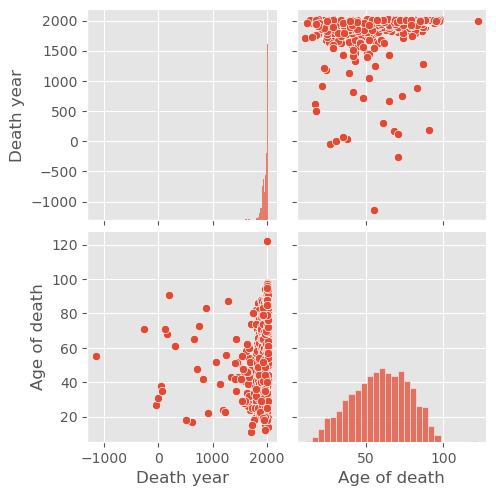

In [28]:
#I will now produce a pairplot to look for possible interesting patterns.
sns.pairplot((df2));

Show histograms for all numeric values

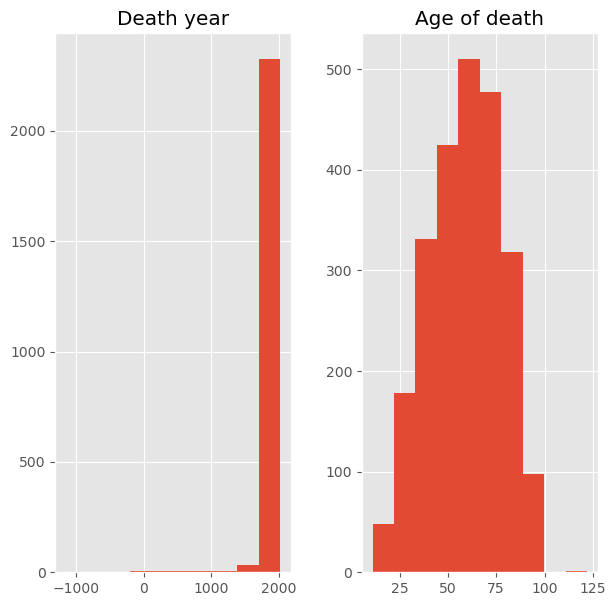

In [29]:
pd.DataFrame.hist(df2, figsize = [7,7]);

Show histograms for Country

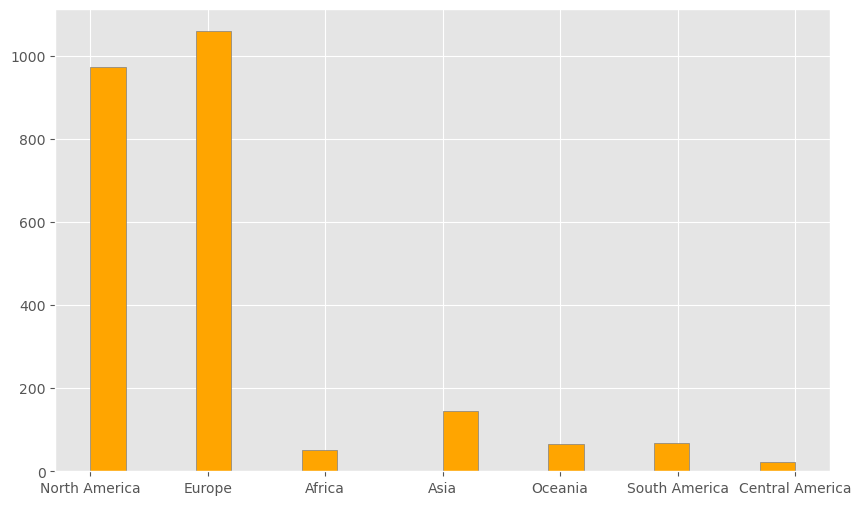

In [30]:
plt.figure(figsize = (10,6))
plt.hist(x = df2["Country"], bins = 20, ec = "grey", fc = "orange")
plt.show()

Show histograms for Occupation

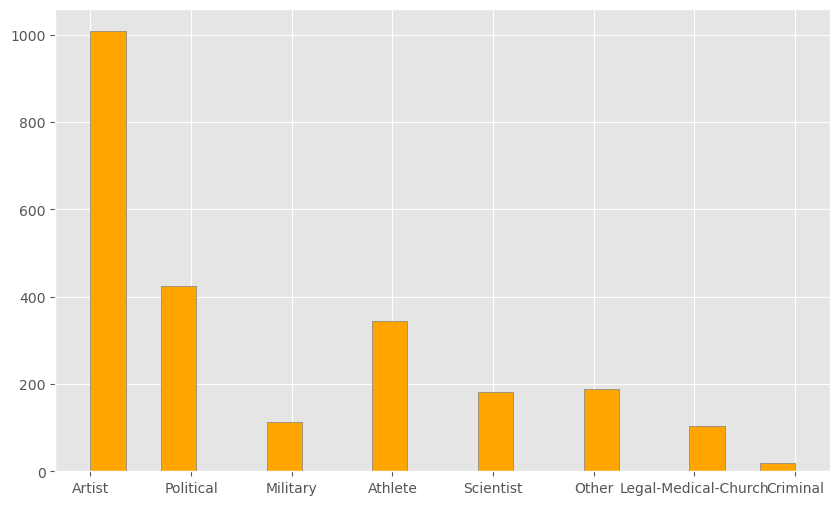

In [31]:
plt.figure(figsize = (10,6))
plt.hist(x = df2["Occupation"], bins = 20, ec = "grey", fc = "orange")
plt.show()

Show the histogram of the year of death and the age of death of the African continent

In [32]:
# df2 = df1.loc[df1['Country']== 'Africa']
# pd.DataFrame.hist(df2, figsize = [7,7]);

Show by occupation how many people died by suicide

In [33]:
# df3 = df1.loc[df1['Manner of death']== 'Suicide']
# #df4 = df3.loc[df3['Occupation']== 'Male']

# plt.figure(figsize = (10,6))
# plt.hist(x = df3["Occupation"], 
#              bins = 20,
#              ec = "grey",
#              fc = "orange", rwidth=10 )

# plt.show()
# print("From the histograms we see that many artists died by suicide")

In [34]:
# df4 = df1.loc[df1['Manner of death']== 'Suicide']
# plt.figure(figsize = (10,6))
# plt.hist(x = df3["Country"], 
#              bins = 20,
#              ec = "grey",
#              fc = "orange", rwidth=10 )

# plt.show()
# print("From the histograms we see that suicides have been more in Europe")

In [35]:
# plt.hist(x = df1["Gender"], 
#              bins = 20,
#              ec = "grey",
#              fc = "orange", rwidth=10 )
# plt.show()
# print("From the histograms we see that there were many more Vip men than women")

In [36]:
# sns.pairplot((df1)) #Plot pairwise relationships in the dataset

### Prepare the lists of numeric features and categorical features

In [37]:
categorical_features = df2.dtypes.loc[df2.dtypes == 'object'].index.values
print("The non-numeric features are:")
print(categorical_features)

The non-numeric features are:
['Gender' 'Country' 'Occupation' 'Manner of death']


In [45]:
numeric_features = list(set(df2.dtypes.index.values)-set(categorical_features))
print("The numeric features are:")
print(numeric_features)

The numeric features are:
['Age of death', 'Death year']


In [46]:
categorical_features = list(set(categorical_features))
print("The categorical features are:")
print(categorical_features)

The categorical features are:
['Gender', 'Country', 'Occupation', 'Manner of death']


### Trasforming categorical into numeric features

I prepare a preprocessor that using the 'OneHotEncoder' function transforms the categorical featurers into numeric ones.

In [69]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
transf_dtype = np.int32

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse = False, dtype = transf_dtype)
pwt = PowerTransformer()
mms = MinMaxScaler()
steps = [('power',pwt),('minmax',mms)]
pow_mms = Pipeline(steps)

transformers = [('cat', categorical_transformer, categorical_features)
                ,('pwt', pow_mms, ['Death year'])
                ,('mms', mms, ['Age of death'])
                ]
preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [88]:
df_p = pd.DataFrame(preprocessor.fit_transform(df2),columns=preprocessor.get_feature_names_out())

In [89]:
df_p.head()

,cat__Gender_Female,cat__Gender_Male,cat__Gender_non-binary,cat__Country_Africa,cat__Country_Asia,cat__Country_Central America,cat__Country_Europe,cat__Country_North America,cat__Country_Oceania,cat__Country_South America,...,cat__Occupation_Political,cat__Occupation_Scientist,cat__Manner of death_Capital punishment,cat__Manner of death_Holocaust,cat__Manner of death_Homicide,cat__Manner of death_Natural causes,cat__Manner of death_Suicide,cat__Manner of death_shipwrecking,pwt__Death year,mms__Age of death
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.669833,0.405405
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.455484,0.351351
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.990225,0.405405
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.649570,0.396396
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.636369,0.288288


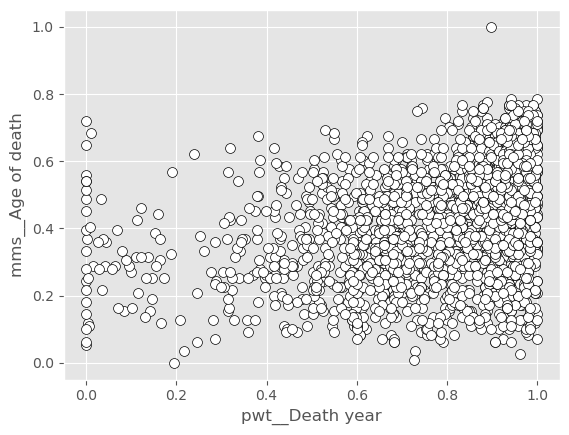

In [90]:
focus = [24,25]
df_p.plot.scatter(x=focus[0],y=focus[1]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50);

In [87]:
preprocessor.get_feature_names_out()

array(['cat__Gender_Female', 'cat__Gender_Male', 'cat__Gender_non-binary',
       'cat__Country_Africa', 'cat__Country_Asia',
       'cat__Country_Central America', 'cat__Country_Europe',
       'cat__Country_North America', 'cat__Country_Oceania',
       'cat__Country_South America', 'cat__Occupation_Artist',
       'cat__Occupation_Athlete', 'cat__Occupation_Criminal',
       'cat__Occupation_Legal-Medical-Church', 'cat__Occupation_Military',
       'cat__Occupation_Other', 'cat__Occupation_Political',
       'cat__Occupation_Scientist',
       'cat__Manner of death_Capital punishment',
       'cat__Manner of death_Holocaust', 'cat__Manner of death_Homicide',
       'cat__Manner of death_Natural causes',
       'cat__Manner of death_Suicide',
       'cat__Manner of death_shipwrecking', 'pwt__Death year',
       'mms__Age of death'], dtype=object)

# ***Clustering***

### KMeans

### Using the elbow method to find the optimal number of clusters

I will try k_means with a number of clusters varying from 2 to 10

    -Prepare two emptys lists for inertia and silhouette scores
    -For each value of the number of clusters:
        initialize an estimator for KMeans and fit_predict
        we will store the distortion (from the fitted model) in the variable distortions
        using the function silhouette_score from sklearn.metrics with arguments the data and the fitted labels, we will fill the variable silhouette_scores

Then i will plot the two lists in the y axis, with the range of k in the x axis.

In [77]:
# Range of possible clusters
k_range = range(2,10)

# Distortion and Silhouette Score as measures
distortions = []
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    random_state = random_state)
    y_km = km.fit_predict(df_p)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_p,y_km))

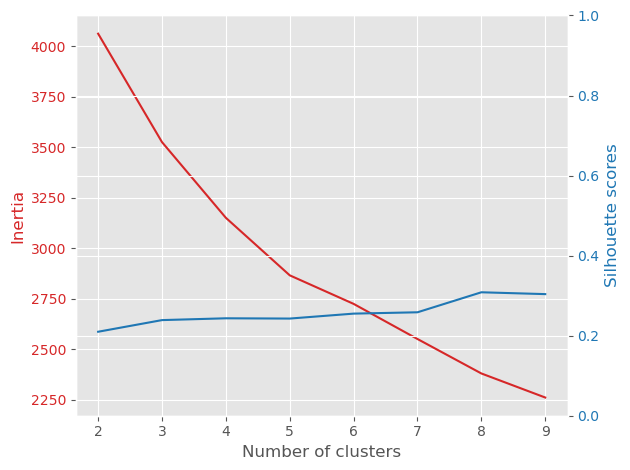

In [78]:
#Plot distortion and silhouette indexes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The silhouette scores plot tell me that we obtain the best result with 3 clusters

In [79]:
good_k = 8

In [94]:
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=random_state)
y_km = km.fit_predict(df_p)

In [96]:
help(plot_clusters)

Help on function plot_clusters in module plot_clusters:

plot_clusters(X, y, dim, points, labels_prefix='cluster', points_name='centroids', colors=<matplotlib.colors.ListedColormap object at 0x11ea4b0d0>, points_color=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points



In [92]:
plot_clusters(df_p,y_km,dim=(focus[0],focus[1]), points = km.cluster_centers_)

InvalidIndexError: (array([False,  True, False, ..., False,  True, False]), 24)

In [ ]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 22355342.41


### Quantifying the quality of clustering via silhouette plots

The silhouette scores for the individual samples are computed with the function silhouette_samples

The function plot_silhouette produces a 'horizontal bar-plot', with one bar for each sample, where the length of the bar is proportional to the silhouette score of the sample. The bars are grouped for cluster and sorted for decreasing length.

A vertical line represents the silhouette score, i.e. the average on all the samples.

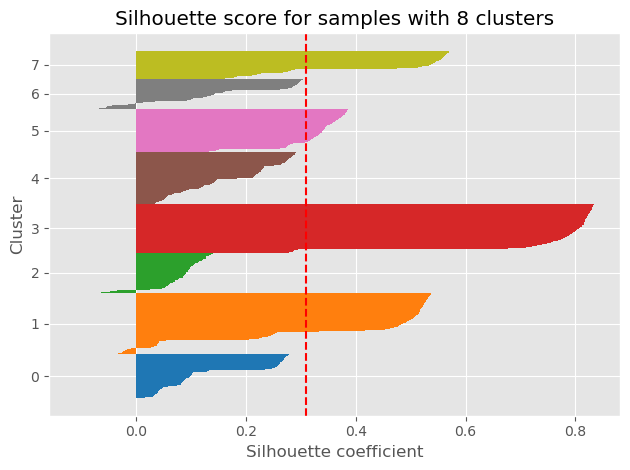

In [83]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(df_p, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

In [ ]:
pt = PowerTransformer()
print(pt.fit(df1_p))
print(pt.lambdas_)

PowerTransformer()
[-3.44227030e+03 -3.44227025e+03 -3.44227030e+03 ...  8.94578416e+00
  9.91664523e+00  1.09956805e+00]


In [ ]:
print(pt.transform(df1_p))

[[-0.0204765  -0.0204765  -0.0204765  ... -0.53638105 -0.61206207
  -0.18775864]
 [-0.0204765  -0.0204765  -0.0204765  ... -1.54991964 -1.65733295
  -0.51497308]
 [-0.0204765  -0.0204765  -0.0204765  ...  1.04584416  0.95032925
  -0.18775864]
 ...
 [-0.0204765  -0.0204765  -0.0204765  ... -0.27049708  0.41009321
   2.01211455]
 [-0.0204765  -0.0204765  -0.0204765  ... -1.06518975 -0.7752464
   1.09613714]
 [-0.0204765  -0.0204765  -0.0204765  ...  0.79083554  0.34653602
  -1.05162269]]


In [ ]:
scaler = MinMaxScaler()
X_mms = scaler.fit_transform(df1_p)
print(X_mms)

[[0.         0.         0.         ... 0.9634375  0.97471555 0.40540541]
 [0.         0.         0.         ... 0.9421875  0.95132743 0.35135135]
 [0.         0.         0.         ... 0.9878125  0.99936789 0.40540541]
 ...
 [0.         0.         0.         ... 0.968125   0.99178255 0.75675676]
 [0.         0.         0.         ... 0.953125   0.97155499 0.61261261]
 [0.         0.         0.         ... 0.984375   0.99083439 0.26126126]]


In [ ]:
good_k = 3
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=random_state)
y_km_mms = km.fit_predict(X_mms)

In [ ]:
km.cluster_centers_

array([[ 6.50521303e-19,  6.50521303e-19,  6.50521303e-19, ...,
         9.66270989e-01,  9.78281003e-01,  4.25350724e-01],
       [ 1.28040973e-03,  1.28040973e-03, -1.13841228e-18, ...,
         9.73357875e-01,  9.87201568e-01,  4.75320391e-01],
       [-5.42101086e-20, -5.42101086e-20,  8.31255195e-04, ...,
         9.62217373e-01,  9.73613690e-01,  4.09172265e-01]])

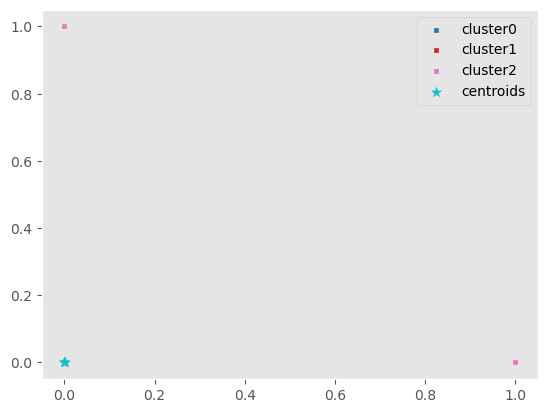

In [ ]:
plot_clusters(df1_p,y_km_mms,dim=(focus[0],focus[1]), points = km.cluster_centers_)

### DBSCAN

Initialize, fit_predict and plot the clusters

In [ ]:
db = DBSCAN()
y_db = db.fit_predict(df1_p)
print(db)

DBSCAN()


In [ ]:
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
if cluster_labels_all[0] == -1:
    noise = True
    print("There is noise")
else:
    noise = False
print("There is/are {} cluster(s)".format(n_clusters-noise))

There is noise
There is/are -1 cluster(s)


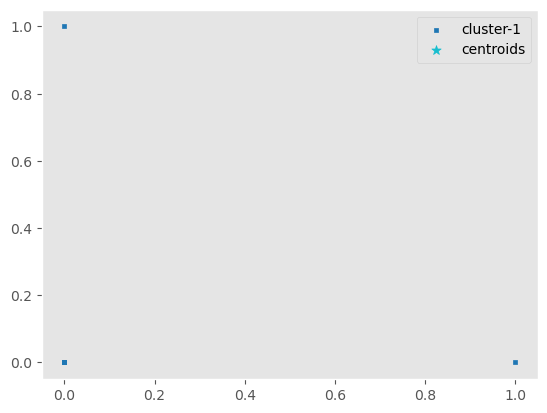

In [ ]:
cluster_centers = np.empty((n_clusters,df1_p.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(df1_p[y_db==i,:], axis = 0)
plot_clusters(df1_p,y_db,dim=(focus[0],focus[1]), points = cluster_centers)